### Preparing Notebook

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
from cycler import cycler

### Fetching Data

In [3]:
# database file can be downloaded at: https://www.kaggle.com/hugomathien/soccer
# Connecting to database
database = 'database.sqlite'
conn = sqlite3.connect(database)

#Fetching data tables
player_data = pd.read_sql("SELECT * FROM Player;", conn)
player_stats_data = pd.read_sql("SELECT * FROM Player_Attributes;", conn)
team_data = pd.read_sql("SELECT * FROM Team;", conn)
match_data = pd.read_sql("SELECT * FROM Match;", conn)

# closing connection
conn.close()

### Exploring Data

In [4]:
player_data.head(2)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


In [5]:
player_stats_data.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [6]:
player_stats_data.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [7]:
team_data.head(2)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


In [8]:
# creating dictionary with team_api_id and team_long_name
team_dict = pd.Series(team_data['team_long_name'].values,index=team_data['team_api_id']).to_dict()

# replacing team number id with team full name
match_data = match_data.replace({"home_team_api_id": team_dict});
match_data = match_data.replace({"away_team_api_id": team_dict});

In [9]:
match_data.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,...,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.4,5.0,1.75,3.35,4.20,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.70,3.3,4.33,1.90,3.3,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.2,3.6,1.80,3.30,3.95,1.90,3.2,3.5,1.9,3.2,3.50,NaN,NaN,NaN,1.83,3.3,3.60,1.95,3.3,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6


In [10]:
match_data.columns.values;

In [11]:
# Creating df for betting agencies odds for home win
bets_home = match_data[['B365H','BWH','IWH','LBH','PSH','WHH','SJH','VCH','GBH','BSH']]
bets_home.head(2)

,B365H,BWH,IWH,LBH,PSH,WHH,SJH,VCH,GBH,BSH
0,1.73,1.75,1.85,1.8,NaN,1.70,1.90,1.65,1.78,1.73
1,1.95,1.80,1.90,1.9,NaN,1.83,1.95,2.00,1.85,1.91


In [12]:
# creating df with max, min, and average betting odds for home win for every game
betsdf = pd.concat([bets_home.max(axis=1), bets_home.min(axis=1), bets_home.mean(axis=1)], keys=['max','min','avg'], axis=1) 
betsdf.sort_values('avg', ascending=False, inplace=True)
betsdf.head(3)

,max,min,avg
24081,36.00,20.0,29.142857
24492,31.13,17.0,24.161429
23920,29.00,14.0,20.857143


In [13]:
# creating dictionary to replace league_id number with full name
league_dict = {1:'Belgium Jupiler League',
1729:'England Premier League',
4769:'France Ligue 1',
7809:'Germany 1. Bundesliga',
10257:'Italy Serie A',
13274:'Netherlands Eredivisie',
15722:'Poland Ekstraklasa',
17642:'Portugal Liga ZON Sagres',
19694:'Scotland Premier League',
21518:'Spain LIGA BBVA',
24558:'Switzerland Super League'}
match_data = match_data.replace({"league_id": league_dict});

### Preparing data for visualizations

In [14]:
# selecting relevant columns from match_data
selected=[2,3,4,7,8,9,10]
# selecting betting odds columns for Home, Draw and Away
for i in range(85,115,3):
    selected.append(i)
for i in range(86,115,3):
    selected.append(i)
for i in range(87,115,3):
    selected.append(i)
# creating df with selected columns
betdf = match_data.iloc[:, selected ]
betdf['avgH'] = betdf.iloc[:,7:17].mean(axis=1)
betdf['avgD'] = betdf.iloc[:,17:27].mean(axis=1)
betdf['avgA'] = betdf.iloc[:,27:37].mean(axis=1)
# dropping individual agencies columns, keeping only averages
betdf = betdf.drop(betdf.columns[7:37], axis=1) 

# create columns with expected result from average quotes and actual goal difference
exp_dict = {'avgH': 'Home','avgD':'Draw','avgA':'Away'}
# create expected outcome column by selecting lowest (average) odds 
betdf['exp_outcome'] = (betdf[betdf.columns[-3:]]).idxmin(axis=1)
betdf = betdf.replace({'exp_outcome':exp_dict})
# create actual outcome column based on goal difference of game
betdf['outcome'] = betdf['home_team_goal']-betdf['away_team_goal']

betdf.head(3)

C:\Users\petrelli\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\petrelli\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\petrelli\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,league_id,season,stage,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,avgH,avgD,avgA,exp_outcome,outcome
0,Belgium Jupiler League,2008/2009,1,KRC Genk,Beerschot AC,1,1,1.765556,3.322222,4.164444,Home,0
1,Belgium Jupiler League,2008/2009,1,SV Zulte-Waregem,Sporting Lokeren,0,0,1.898889,3.250000,3.616667,Home,0
2,Belgium Jupiler League,2008/2009,1,KSV Cercle Brugge,RSC Anderlecht,0,3,2.462222,3.233333,2.544444,Home,-3


## Upsets by League and Prediction
Looking at upsets in different leagues to determine whether there is any difference among leagues or among predicted outcomes.

In [15]:
 def upset(data, league, result):
    '''Computes percentage of times betting agencies are RIGHT using their average 'consensus'.
       Function prints out percentage of wrong predictions, or percentage of upsets, 
       BUT it returns the percentage of correctness'''
    
    upset_df = data[data['league_id'] == league]
    
    number = 1000  # high number to check new value was assigned
    if result == 'Draw':
        # build df with only matches expected to be draw
        upset_df = upset_df[upset_df['exp_outcome'] == 'Draw']
        # count total number of such games
        predictions = upset_df['exp_outcome'].value_counts()
        # keep games that did NOT end as expected
        upset_df = upset_df[upset_df['outcome'] != 0]
        if upset_df.empty:
            pass
        else:
            # compute number = 'percentage of upsets' and games = 'number of predictions'
            number = 100*(len(upset_df)/predictions[0])
            games = predictions[0]
            # prints report on finding
            print('{0}: {1} upsets when expecting a draw, or {2:.2f}% of {3} games'.format(upset_df.iloc[0,0], len(upset_df), number, games))
    elif result == 'Home':
        upset_df = upset_df[upset_df['exp_outcome'] == 'Home']
        predictions = upset_df['exp_outcome'].value_counts()
        upset_df = upset_df[upset_df['outcome'] <= 0]
        if upset_df.empty:
            pass
        else:
            number = 100*(len(upset_df)/predictions[0])
            games = predictions[0]
            print('{0}: {1} upsets when expecting home win, or {2:.2f}% of {3} games'.format(upset_df.iloc[0,0], len(upset_df), number, games))
    elif result == 'Away':
        upset_df = upset_df[upset_df['exp_outcome'] == 'Away']
        predictions = upset_df['exp_outcome'].value_counts()
        upset_df = upset_df[upset_df['outcome'] >= 0]
        if upset_df.empty:
            pass
        else:
            number = 100*(len(upset_df)/predictions[0])
            games = predictions[0]
            print('{0}: {1} upsets when expecting away win, or {2:.2f}% of {3} games'.format(upset_df.iloc[0,0], len(upset_df), number, games))
    else:
        print("Result must be one of 'Draw', 'Home', or 'Away'")
    
    #check on whether a result was predicted or not (for most leagues draw is never the most likely predictions)    
    if number != 1000:
        return (upset_df.iloc[0,0], result, (100-number), games)
    else:
        return (None,None,None,None)

# taking out Polish and Swiss leagues as booking odd for these games are missing
leagues = [value for key, value in league_dict.items() if value not in ['Poland Ekstraklasa','Switzerland Super League']]
results = ['Draw','Home','Away']
# build list with tuples of data from predictions function's return
correct_pred = []
for league in leagues:
    for result in results:
        correct_pred.insert(1, upset(betdf, league, result))

Belgium Jupiler League: 547 upsets when expecting home win, or 45.13% of 1212 games
Belgium Jupiler League: 259 upsets when expecting away win, or 52.43% of 494 games
England Premier League: 981 upsets when expecting home win, or 45.35% of 2163 games
England Premier League: 439 upsets when expecting away win, or 50.06% of 877 games
France Ligue 1: 1 upsets when expecting a draw, or 33.33% of 3 games
France Ligue 1: 1147 upsets when expecting home win, or 49.23% of 2330 games
France Ligue 1: 355 upsets when expecting away win, or 50.43% of 704 games
Germany 1. Bundesliga: 838 upsets when expecting home win, or 47.29% of 1772 games
Germany 1. Bundesliga: 354 upsets when expecting away win, or 52.44% of 675 games
Italy Serie A: 13 upsets when expecting a draw, or 46.43% of 28 games
Italy Serie A: 980 upsets when expecting home win, or 44.95% of 2180 games
Italy Serie A: 408 upsets when expecting away win, or 50.62% of 806 games
Netherlands Eredivisie: 714 upsets when expecting home win, o

In [16]:
# eliminate (None, None, None, None) tuples
correct_pred = [value for value in correct_pred if value != (None,None,None,None)]
# build df
cor_df = pd.DataFrame(correct_pred, columns=['League','Result','Correct (%)','Games'])
# replace League full name with short country name
cor_df['League']=cor_df['League'].str.split().str.get(0)
cor_df.head()

,League,Result,Correct (%),Games
0,Spain,Away,52.431012,761
1,Spain,Home,57.462687,2278
2,Scotland,Away,52.813067,551
3,Scotland,Home,49.646504,1273
4,Portugal,Away,54.742097,601


In [17]:
indexed = cor_df.set_index(['League','Result'])   #, inplace=True) 
# cor_df.reset_index(1).reset_index(0)
plot_df = indexed.drop('Games',axis=1)
plot_df.head()

Correct (%)
League   Result             
Spain    Away      52.431012
         Home      57.462687
Scotland Away      52.813067
         Home      49.646504
Portugal Away      54.742097

In [18]:
# computing average correctness by expected outcome
avg_home_corr = np.average(indexed.unstack(1)[[2]].dropna(), weights=indexed.unstack(1)[[5]].dropna())
print('Home win correctness:\t{0:.2f}%'.format(avg_home_corr))
avg_draw_corr = np.average(indexed.unstack(1)[[1]].dropna(), weights=indexed.unstack(1)[[4]].dropna())
print('Draw correctness:\t{0:.2f}%'.format(avg_draw_corr))
avg_away_corr = np.average(indexed.unstack(1)[[0]].dropna(), weights=indexed.unstack(1)[[3]].dropna())
print('Away win correctness:\t{0:.2f}%'.format(avg_away_corr))
# correctness of betting agencies' "consensus" over all games
avg_pred_corr = np.average(indexed['Correct (%)'], weights=indexed.Games)
print('Overall correctness:\t{0:.2f}%'.format(avg_pred_corr))

Home win correctness:	54.31%
Draw correctness:	54.84%
Away win correctness:	50.43%
Overall correctness:	53.25%


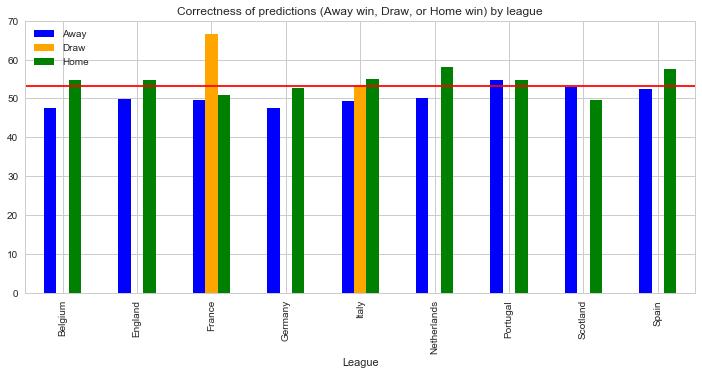

In [19]:
plt.close('all')
plot_df.unstack(1).plot(kind='bar',  figsize=(12,5), color=['blue','orange','green']); 
# option  subplots=True,  splits graph by (inner) index values and displays by outer index value
plt.legend(['Away','Draw','Home'])
plt.title('Correctness of predictions (Away win, Draw, or Home win) by league')
plt.axhline(avg_pred_corr, color='red')
plt.show()

A few interesting things stand out from the above bar chart. First of all booking agencies almost never predict a draw for games. This basically means that they are ok with being wrong roughly one fourth of the times, as 25.3% of all games actually end in a draw. Of all games only 31 were 'expected' to more likely be a draw, 28 in the Italian league and 3 in the French league. This is something to consider if one wants to improve on the booking agencies overall correctness rate, computed at 53.2%. It is important here to specify that betting agencies have several ways to 'hedge' against such predictions which are reflected in the odds offered on the games. In other words, while they might favor a result over another their overall odds strategy will offset such problems.

Another observation is that generally agencies do a better job of predicting a home win rather than an away win. The only exceptions are the Scottish league, where the opposite is true, and the Portuguese league where the difference is minimal.  Comparison with predictions of draw should not be done given the really low number of such cases. Predicting a home win seems, intuitively, easier than an away win, especially when the difference between two teams is high. We will return to this point a little bit later to confirm our intuition.

To learn more from this graph we zoom in on the results and display horizontal lines at the values of the average predictions across all leagues (by predicted outcome of a game). In the following graph we drop the draw category, due to the low amount of games and reliability of related statistics.


In [20]:
df = betdf[(betdf.league_id != 'Poland Ekstraklasa') & (betdf.league_id != 'Switzerland Super League')] 
goal_diff = df.outcome.value_counts()
# goal_diff
# percentage of Draw results
100*goal_diff[0]/goal_diff.sum()

25.290453682025003

In [21]:
plot_zoom_df = cor_df#.set_index('League')   #, inplace=True) 
plot_zoom_df = cor_df[cor_df.Result != 'Draw']
plot_zoom_df.set_index(['League','Result'], inplace=True)
# cor_df.reset_index(1).reset_index(0)   ### to reset indexes
plot_zoom_df.drop('Games',axis=1, inplace=True)
plot_zoom_df.head()

C:\Users\petrelli\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Correct (%)
League   Result             
Spain    Away      52.431012
         Home      57.462687
Scotland Away      52.813067
         Home      49.646504
Portugal Away      54.742097

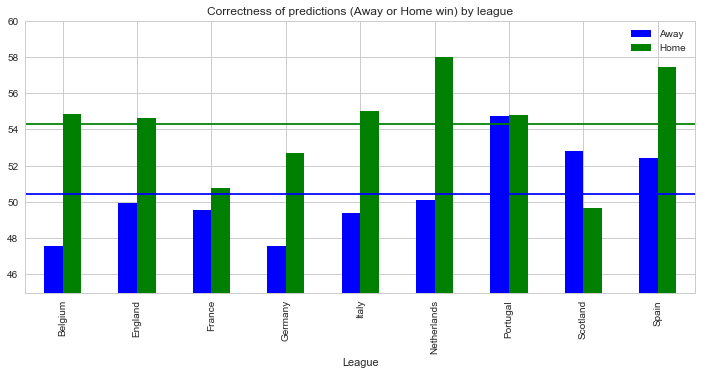

In [22]:
plt.close('all')
plot_zoom_df.unstack(1).plot(kind='bar',  figsize=(12,5), color=['blue','green']); 
# option  subplots=True,  splits graph by (inner) index values and displays by outer index value
plt.legend(['Away','Home'])
plt.title('Correctness of predictions (Away or Home win) by league')
plt.axhline(avg_away_corr, color='blue')
# plt.axhline(avg_draw_corr, color='orange')
plt.axhline(avg_home_corr, color='green')
plt.ylim((45,60))
plt.show()

As we can see the agencies seem to do better on certain leagues. The Spanish and the Portuguese leagues are both predicted correctly above average for both Home and Away wins. Other leagues have differing outcomes, given Home or Away. It is easier than average to predict a home win, and worse than average to predict an away win in Belgium, England, Italy and the Netherlands, while the opposite is true for Scotland. The hardest leagues to predict are the French and German leagues where betting agencies do worse than average in both home and away wins.

### Home Advantage

To confirm our earlier intuition that predicting home wins is easier, due to home advantage, we investigate home advantage. We look at the value of the difference between home and away wins' percentages, and goals scored, for teams in all leagues. 

In [23]:
# overall look at goals scored and game results to look at home team advantage
print('Average Home Goals:\t{0:.3f}'.format(match_data['home_team_goal'].mean()))
print('Average Away Goals:\t{0:.3f}'.format(match_data['away_team_goal'].mean()))
print('Percentage Home Wins:\t{0:.2f}%'.format(100*(match_data['home_team_goal'] > match_data['away_team_goal']).mean()))
print('Percentage Away Wins:\t{0:.2f}%'.format(100*(match_data['home_team_goal'] < match_data['away_team_goal']).mean()))


Average Home Goals:	1.545
Average Away Goals:	1.161
Percentage Home Wins:	45.87%
Percentage Away Wins:	28.74%


There seems to be a clear home advatange as Home teams score almost half a goal extra compared to Away teams. In addition Home teams win about 46% of all games while Away teams only win about 29% of all games, the remaining 25%, as seen earlier ends in a draw. 

We next look at individual leagues to see whether there are any interesting difference among the leagues.

In [24]:
# Creating data objects for home and away goal averages, and home and away win percentages
home = match_data['home_team_goal'].groupby(match_data['league_id']).mean()
away = match_data['away_team_goal'].groupby(match_data['league_id']).mean()
home_wins = (match_data['home_team_goal'] > match_data['away_team_goal']).groupby(match_data['league_id']).mean()
away_wins = (match_data['home_team_goal'] < match_data['away_team_goal']).groupby(match_data['league_id']).mean()

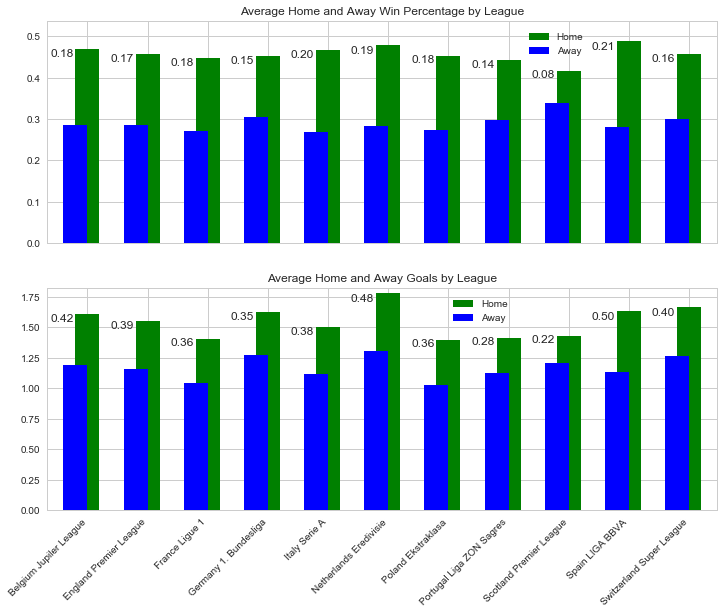

In [25]:
plt.close('all')
fig, ax = plt.subplots(2, figsize=(12,9), sharex=True)

bar_width = 0.4  # default: 0.8
bar_locations = np.arange(11)

home_wins_bar = ax[0].bar(bar_locations, home_wins, bar_width, color='green')
away_wins_bar = ax[0].bar(bar_locations - (bar_width / 2), away_wins, bar_width, color='blue')
ax[0].set_title('Average Home and Away Win Percentage by League')
ax[0].set_xticks(np.arange(11))
ax[0].set_xticklabels(home_wins.index)
ax[0].legend((home_wins_bar[0], away_wins_bar[0]), ('Home', 'Away'), loc=(.7125,.825))
ax[0].margins(.025,.1)

home_bar = ax[1].bar(bar_locations, home, bar_width, color='green')
away_bar = ax[1].bar(bar_locations - (bar_width / 2), away, bar_width, color='blue')
ax[1].set_title('Average Home and Away Goals by League')
ax[1].set_xticks(bar_locations)
ax[1].set_xticklabels(home.index, ha='right', rotation=45)
ax[1].legend((home_bar[0], away_bar[0]), ('Home', 'Away'), loc=(.6,.825))
ax[1].margins(0.025,0.025)

def autolabel(ax, homes, aways):
    """
    Attach a text label above each home bar displaying difference in height with away bar
    """
    for home, away in zip(homes, aways):
        height_home = home.get_height()
        height_away = away.get_height()
        ax.text(home.get_x() - home.get_width()/1.75, .95*height_home,
                '%.2f' % (height_home-height_away),
                ha='center', va='bottom')

autolabel(ax[0], home_wins_bar, away_wins_bar)
autolabel(ax[1], home_bar, away_bar)

plt.show()

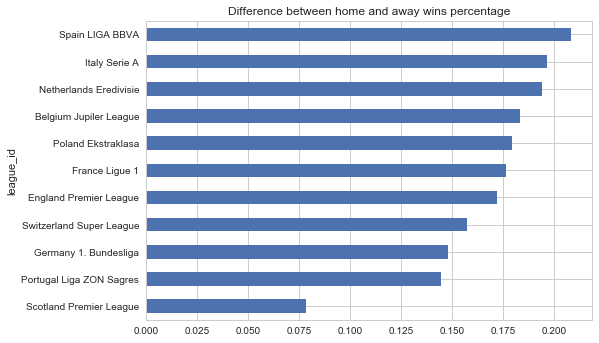

In [26]:
win_diff = home_wins - away_wins
# print('Difference Home/Away Wins:\n', win_diff )
# plotting percentage difference between home and away wins
win_diff.sort_values().plot(kind='barh', title='Difference between home and away wins percentage');
plt.show()

We now look at whether there is any relation between this result and how predictable a league is. To do this we first compute a weighted average for correctness of predictions, including all predictions: Home, Draw, and Away, and then look at whether there is any correlation when using the above 'home advantage' values to explain league predictability. We will, once again, drop the Polish and Swiss league as we don't have betting odds for them.

In [27]:
# compute weighted avg correctness by league
league_avg_corr = [(league,np.average(cor_df[cor_df['League']==league]['Correct (%)'], weights=cor_df[cor_df['League']==league]['Games'])) for league in cor_df['League'].unique()]
# transform above list of tuples into a Pandas Series
league_avg = pd.Series(dict(league_avg_corr))
league_avg

Belgium        52.754982
England        53.289474
France         50.510372
Germany        51.287291
Italy          53.516921
Netherlands    55.582822
Portugal       54.767726
Scotland       50.603070
Spain          56.202698
dtype: float64

In [28]:
win_diff = home_wins - away_wins
win_diff = win_diff.drop(['Poland Ekstraklasa','Switzerland Super League'])
win_diff.index = league_avg.index
win_diff

Belgium        0.183449
England        0.172039
France         0.176645
Germany        0.148284
Italy          0.196553
Netherlands    0.194036
Portugal       0.144737
Scotland       0.078399
Spain          0.208553
dtype: float64

In [29]:
stats.pearsonr(win_diff, league_avg)

(0.60107920353601341, 0.086904234420001406)

The test seems to show that there is indeed a linear correlation between these variables although the p-value is somewhat high, as we can see in the graph below showing the confidence interval.

Nevertheless we can say that it seems to be somewhat easier to predict games when the home advanage is higher.

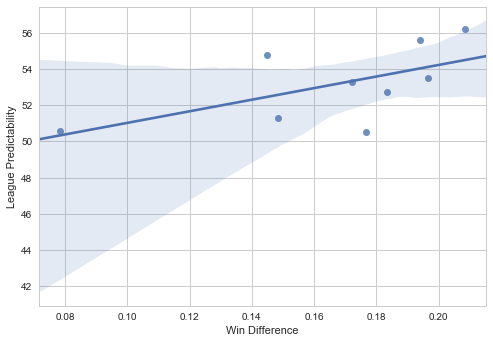

In [30]:
data=pd.concat([win_diff,league_avg], axis=1)
data.columns = ['Win Difference', 'League Predictability']
sns.regplot('Win Difference','League Predictability', data=data, fit_reg=True)
plt.show()

## Teams

We now look at how individual teams perform at home and away.

In [31]:
# most successful home teams across all leagues (% of home wins)
best_home_wins = ((match_data['home_team_goal'] > match_data['away_team_goal']).groupby(match_data['home_team_api_id']).mean()).sort_values(ascending=False)
best_home_wins.head(20)

home_team_api_id
FC Barcelona           0.861842
Real Madrid CF         0.848684
FC Porto               0.822581
SL Benfica             0.822581
FC Bayern Munich       0.801471
Celtic                 0.789474
PSV                    0.772059
Manchester United      0.763158
Ajax                   0.757353
RSC Anderlecht         0.745283
Manchester City        0.743421
Rangers                0.736842
FC Basel               0.720280
Club Brugge KV         0.707547
Juventus               0.695364
Atlético Madrid        0.677632
Legia Warszawa         0.675000
Paris Saint-Germain    0.671053
Chelsea                0.664474
SC Braga               0.653226
dtype: float64

In [32]:
best_away_wins = ((match_data['home_team_goal'] < match_data['away_team_goal']).groupby(match_data['away_team_api_id']).mean()).sort_values(ascending=False)
best_away_wins.head(20)

away_team_api_id
Rangers                0.684211
FC Barcelona           0.677632
SL Benfica             0.669355
FC Porto               0.653226
Real Madrid CF         0.651316
Celtic                 0.644737
FC Bayern Munich       0.617647
Ajax                   0.573529
Juventus               0.560000
FC Basel               0.538462
RSC Anderlecht         0.537736
PSV                    0.536765
Sporting CP            0.524194
Borussia Dortmund      0.507353
Manchester United      0.500000
Chelsea                0.493421
Paris Saint-Germain    0.480263
Arsenal                0.480263
Legia Warszawa         0.466667
Club Brugge KV         0.452830
dtype: float64

In [33]:
# identifying teams with highest overall winning percentage
most_winning = ((best_away_wins+best_home_wins)/2).sort_values(ascending=False)
most_winning.head(20)

FC Barcelona           0.769737
Real Madrid CF         0.750000
SL Benfica             0.745968
FC Porto               0.737903
Celtic                 0.717105
Rangers                0.710526
FC Bayern Munich       0.709559
Ajax                   0.665441
PSV                    0.654412
RSC Anderlecht         0.641509
Manchester United      0.631579
FC Basel               0.629371
Juventus               0.627682
Sporting CP            0.580645
Club Brugge KV         0.580189
Chelsea                0.578947
Borussia Dortmund      0.577206
Manchester City        0.575658
Paris Saint-Germain    0.575658
Legia Warszawa         0.570833
dtype: float64

Not surprisingly, the two big Spanish juggernauts Barcelona and Real Madrid come out on top of this special ranking. Several less known teams appear in this ranking as well, given that all the games in question are played within each country league. Thus we see close to the top; Celtic and Rangers (Scotland), RSC Anderlecht and Club Brugge KV (Belgium), FC Basel (Switzerland), and Legia Warszawa and Lech Poznan (Poland). All these teams can be considered juggernauts in their domestic leagues.

As a further consideration we now have a better idea about why the Spanish, Dutch, and Portuguese leagues turned out to be the three most predictable leagues, with respectively 56.2%, 55.8%, and 54.8% of results predicted correctly. Each of these leagues has two teams in the top 9. An anomaly seems to be Scotland again. Although Celtic and Rangers are right after the two Spanish juggernauts Barcelona and Real Madrid and the the two top Portuguese teams Benfica and Porto, the league overall is the least predictable with the exception of the French league. We recall that Scotland was also the league with the smallest home advantage effect, as shown below, possibly these two 'anomalies' have something to do with each other. 

In [34]:
league_avg.sort_values(ascending=False)

Spain          56.202698
Netherlands    55.582822
Portugal       54.767726
Italy          53.516921
England        53.289474
Belgium        52.754982
Germany        51.287291
Scotland       50.603070
France         50.510372
dtype: float64

## Statistics by League and Stage Number

We now look at whether there is any difference in home win percentage by stage number. We compute the average home wins considering all data. That is: from year 2008/09 to 2015/16. For most leagues this correspond to 80 games per stage number. We now also limit ourselves to the 5 major European leagues: England Premiere League, France Ligue 1, Germany Bundesliga, Italy Serie A and Spain Liga BBVA.

The goal is to determine whether at any given stage for any league, or all leagues in general, the home advantage is greater or not. Our expectation is that there should not be a great difference.

In [35]:
# set color to identify country
tableau5 = [(31, 119, 180), (44, 160, 44),(255, 207, 100),(174, 199, 232), (255, 107, 14) ]
# tableau5 = [(31, 119, 180), (44, 160, 44),(255, 187, 120),(174, 199, 232), (255, 127, 14) ]
for i in range(len(tableau5)):    
    r, g, b = tableau5[i]    
    tableau5[i] = (r / 255., g / 255., b / 255.)
mpl.rcParams['axes.prop_cycle'] = cycler('color',tableau5)
# mpl.rcParams['axes.prop_cycle'] = tableau5    # deprecated

In [36]:
leagues = ['England Premier League', 'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A', 'Spain LIGA BBVA' ]
shorts = ['England', 'France', 'Germany', 'Italy', 'Spain' ]

hw_df = match_data[match_data['league_id'].isin(leagues)]
hw_top5 = 100*(hw_df['home_team_goal'] > hw_df['away_team_goal']).mean()
print('Percentage Home Wins in 5 major leagues combined:\t{0:.2f}%'.format(hw_top5))

Percentage Home Wins in 5 major leagues combined:	46.27%


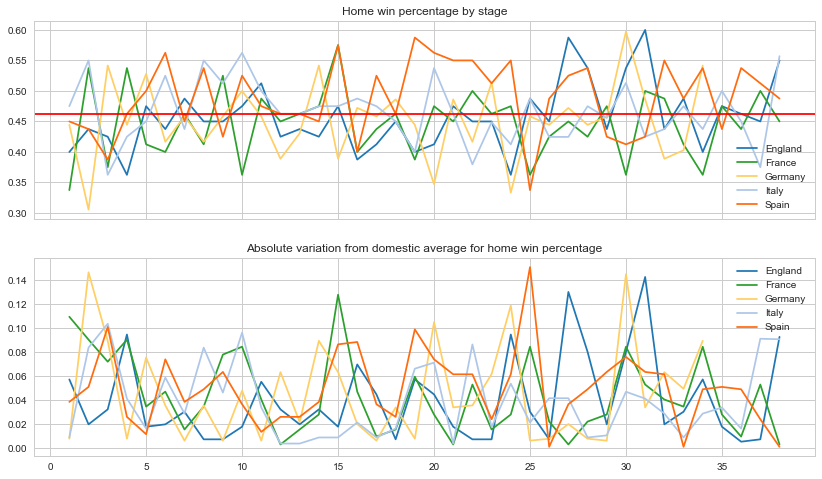

In [37]:
# Displaying home winning percentage by stage number for major European leagues:
# Italy Serie A, Spain LIGA BBVA, Germany 1. Bundesliga, France Ligue 1, and England Premier League
# goal is to determine whether certain stages (as in beginning, middle season, end of league) are more variable

# breaking down data according to league_id
country={}
for short,league in zip(shorts,leagues):
    country[short] = match_data[match_data['league_id'] == league]

# saving stage averages for winning percentages by home team by stage
stage={}
for short in shorts:
    stage[short] = (country[short]['home_team_goal'] > country[short]['away_team_goal']).groupby(country[short]['stage']).mean()
    
# computing difference between current stage and average for all stages
diff={}
for short in shorts:
    diff[short] = abs(stage[short] - stage[short].mean())
    
# plotting results
plt.close('all')
fig, (ax1, ax2) = plt.subplots(2,figsize=(14,8), sharex=True)

for data,label in zip(list(stage.values()),shorts):
    ax1.plot(data, label=label)
for data,label in zip(list(diff.values()),shorts):
    ax2.plot(data, label=label)

ax1.set_title('Home win percentage by stage')
ax1.axhline(hw_top5/100, c='r')
ax2.set_title('Absolute variation from domestic average for home win percentage')
ax1.legend()
ax2.legend()

plt.show()

The top graph displaying the home win percentage by stage does not reveal anything unusual, results seem to hover around the average for all stages, which for the top 5 leagues is 46.27%. The second graph looks at the (absolute) difference with the average in each league, and while showing some peaks again does not seem to show that there is any meaningful difference. 

The variation among single stages is too high for us to pick up any meaningful difference, so we try to group stages and display the average of N consecutive stages, with N a parameter we set equal to 5, corresponding for most leagues to about a month of games. We also separate the plots and display the individual country average home win percentage. Results are shown in the following graph.

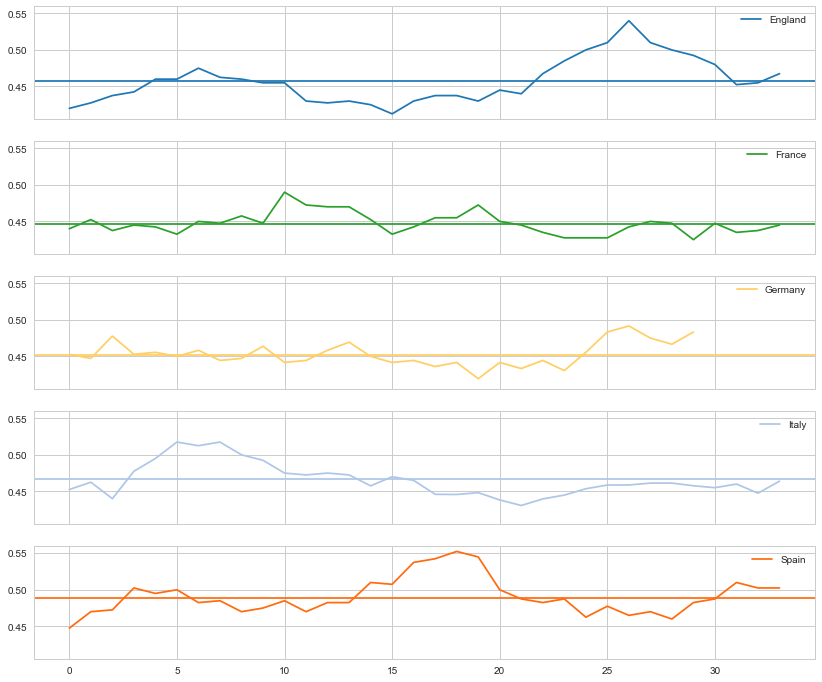

In [38]:
# running average of N consecutive games
# mode options = 'full', 'valid', 'same'
N=5
mode='valid'

# compute individual home win averages
hw_league={}

for short,league in zip(shorts, leagues):
    hw_df = match_data[match_data['league_id'] == league]
    hw_league[short] = (hw_df['home_team_goal'] > hw_df['away_team_goal']).mean()

plt.close('all')
# plt.figure(figsize=(14,6))
fig, axes = plt.subplots(5,1,  figsize=(14,12) , sharex=True, sharey=True)

for ax,short,color in zip(fig.get_axes(),shorts,tableau5):
    ax.plot(np.convolve(stage[short], np.ones((N,))/N, mode=mode), color=color, label=short)
    ax.axhline(hw_league[short], color=color)
    ax.legend()

plt.show();

All graphs use the same axes limits so that it is easier to see any anomalies. It looks like the graph for France Ligue 1 doesn't display any pattern, while those for the other leagues do. In England and Germany home field advantage seems to be more important towards the end of the season, while in Italy the opposite is true. Finally, in Spain the best time to play at home is the middle of the season.

Another interesting observation is that generally home field advantage is less important through the first few games, as all graphs above are at or below their averages. We recall that the first point in each graph, at the 0 mark, correspond to the average of the first N=5 games, while the last corresponds to the average of the last 5 games.

## Goals

The game of soccer is all about scoring one more goal than the opponent, so we conclude with a look at how many goals are scored per game. We start with a graph depicting the average of the total amount of goals scored (by home and away teams) in the 5 major leagues, and we conclude with an histogram of their distribution for each of the 5 leagues.

Average goals per game:
England: 2.71
France: 2.44
Germany: 2.90
Italy: 2.62
Spain: 2.77


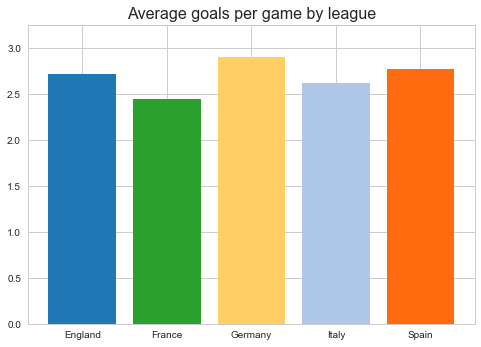

In [39]:
goals={}
for short,league in zip(shorts,leagues):
    df=match_data[match_data['league_id']==league]
    goals[short]=df['home_team_goal']+df['away_team_goal']

# determine average goals by league, display result in bar graph
avg_goals = {}
print('Average goals per game:')
for short in shorts:
    avg_goals[short] = goals[short].mean()
    print('{0}: {1:.2f}'.format(short, avg_goals[short]))
plt.close('all')
plt.bar(range(5),list(avg_goals.values()), tick_label=shorts, color=tableau5)
plt.title('Average goals per game by league', fontsize=16)
plt.ylim([0,3.25])
plt.show()


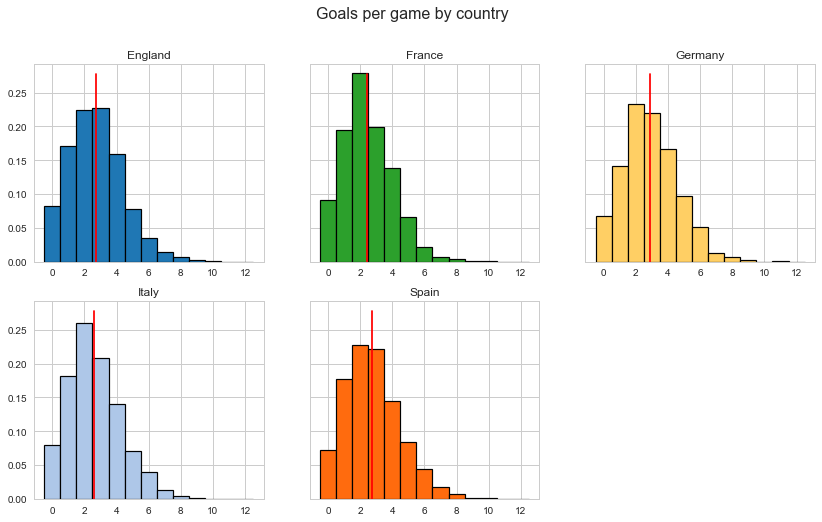

In [41]:
plt.close('all')
fig, axes = plt.subplots(2,3,  figsize=(14,8), sharex=True, sharey=True)
ax_lst = fig.get_axes()

most=0
for short in shorts:
    if most < max(goals[short]):
        most = max(goals[short])

#creating histogram with correct number of bins centered at integer values
for ax,short,color in zip(ax_lst,shorts,tableau5):
    ax.hist(goals[short], bins=np.linspace(-.5,most+.5,14), color=color, edgecolor='black', linewidth=1.2, normed=True)

# displaying average value as vertical black line
for ax,short in zip(ax_lst,shorts):
    ax.axvline(avg_goals[short],color='red', ymax=.95)
    
# subplots titles & main title
plt.suptitle('Goals per game by country', fontsize=16)
for ax,short in zip(ax_lst,shorts):
    ax.title.set_text(short)

# setting up, and making sure, tickmarks are present
axes[0, 0].set_xticks([0, 2, 4, 6, 8, 10, 12])  # this with sharex=True only shows tick marks for bottom graphs
# adds tick marks to top row graphs
for ax in ax_lst[:3]:
    plt.setp(ax.get_xticklabels(), visible=True)

#deletes empty graph in (1,2) position (or (-1,-1)=(last,last) position)
fig.delaxes(axes[-1,-1]) 
plt.show()


All the distribution are right skewed, but in general seem to look roughly bell-shaped. No differences are apparent from these graphs, besides that in some leagues, like Germany and Spain, slightly more high scoring games are played.